<a href="https://colab.research.google.com/github/dasog94/PresumptionofMontlyRent/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


#Libs

In [128]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

#Load Data

In [59]:
df = pd.read_csv('/content/gdrive/My Drive/recommend_system/tracer/Merged_data.csv', encoding='CP949')

In [60]:
df.head(10)

,건물명,건축년도,계약년월,계약일,단지명,도로명,지번,보증금(만원),보증금->월세,본번,부번,법정동명,월세(만원),전용면적,전월세구분,층,거주타입,건물명_건물동명,건물식별번호,건물연령,공동주택명,공시가격,데이터기준일자
0,NaN,1999,201804,13,동성아파트(1동),동숭4라길 29,4-161,20000.0,66.666667,4,161,서울특별시 종로구 동숭동,0.0,57.96,전세,3,아파트&오피스텔,동성아파트 1동,24809.0,22.0,동성아파트(1동),162000000.0,2020-07-27
1,NaN,1999,201910,18,동성아파트(2동),동숭4라길 27,4-157,22000.0,73.333333,4,157,서울특별시 종로구 동숭동,0.0,59.34,전세,6,아파트&오피스텔,동성아파트 2동,29649.0,22.0,동성아파트(2동),158000000.0,2020-07-27
2,(129-23),1997,201806,2,NaN,동숭4나길 28-1,129-23,13000.0,43.333333,129,23,서울특별시 종로구 동숭동,0.0,47.20,전세,4,연립다세대,예일하우스,17641.0,24.0,(129-23),122000000.0,2020-07-27
3,(129-24),1997,201712,9,NaN,동숭4나길 28,129-24,14000.0,46.666667,129,24,서울특별시 종로구 동숭동,0.0,38.54,전세,4,연립다세대,0,22280.0,24.0,(129-24),98500000.0,2020-07-27
4,(129-74),1994,201802,20,NaN,낙산1길 22-1,129-74,25000.0,83.333333,129,74,서울특별시 종로구 동숭동,0.0,54.02,전세,2,연립다세대,0,10769.0,27.0,(129-74),136000000.0,2020-07-27
5,(129-74),1994,201803,26,NaN,낙산1길 22-1,129-74,20000.0,66.666667,129,74,서울특별시 종로구 동숭동,0.0,34.56,전세,1,연립다세대,0,10769.0,27.0,(129-74),80700000.0,2020-07-27
6,(129-74),1994,201807,28,NaN,낙산1길 22-1,129-74,33000.0,110.000000,129,74,서울특별시 종로구 동숭동,0.0,54.02,전세,2,연립다세대,0,10769.0,27.0,(129-74),136000000.0,2020-07-27
7,(130-7),2014,201806,27,NaN,동숭2길 13-3,130-7,1000.0,48.333333,130,7,서울특별시 종로구 동숭동,45.0,15.51,월세,1,연립다세대,0,NaN,NaN,(130-7),61400000.0,2020-07-27
8,(14-2),1998,201801,24,NaN,동숭4나길 5,14-2,7000.0,48.333333,14,2,서울특별시 종로구 동숭동,25.0,25.60,월세,2,연립다세대,0,10902.0,23.0,(14-2),62500000.0,2020-07-27
9,(14-2),1998,201808,2,NaN,동숭4나길 5,14-2,9000.0,40.000000,14,2,서울특별시 종로구 동숭동,10.0,25.60,월세,4,연립다세대,0,10902.0,23.0,(14-2),62500000.0,2020-07-27


In [61]:
df.dtypes

건물명          object
건축년도          int64
계약년월          int64
계약일           int64
단지명          object
도로명          object
지번           object
보증금(만원)     float64
보증금->월세     float64
본번            int64
부번            int64
법정동명         object
월세(만원)      float64
전용면적        float64
전월세구분        object
층             int64
거주타입         object
건물명_건물동명     object
건물식별번호      float64
건물연령        float64
공동주택명        object
공시가격        float64
데이터기준일자      object
dtype: object

#Form Data Table

In [139]:
df_arranged = df.loc[:, ['건축년도', '계약년월', '공시가격', '법정동명', '보증금->월세']]
df_arranged = df_arranged.dropna(axis=0)

In [140]:
df_arranged.head(10)

,건축년도,계약년월,공시가격,법정동명,보증금->월세
0,1999,201804,162000000.0,서울특별시 종로구 동숭동,66.666667
1,1999,201910,158000000.0,서울특별시 종로구 동숭동,73.333333
2,1997,201806,122000000.0,서울특별시 종로구 동숭동,43.333333
3,1997,201712,98500000.0,서울특별시 종로구 동숭동,46.666667
4,1994,201802,136000000.0,서울특별시 종로구 동숭동,83.333333
5,1994,201803,80700000.0,서울특별시 종로구 동숭동,66.666667
6,1994,201807,136000000.0,서울특별시 종로구 동숭동,110.000000
7,2014,201806,61400000.0,서울특별시 종로구 동숭동,48.333333
8,1998,201801,62500000.0,서울특별시 종로구 동숭동,48.333333
9,1998,201808,62500000.0,서울특별시 종로구 동숭동,40.000000


In [141]:
df_arranged.dtypes

건축년도         int64
계약년월         int64
공시가격       float64
법정동명        object
보증금->월세    float64
dtype: object

In [142]:
# 법정동 one hot encoding
df_arranged['법정동명'] = pd.Categorical(df_arranged['법정동명'])
df_arranged['법정동명'] = df_arranged['법정동명'].cat.codes

# float94 or int8 -> int64
for each in df_arranged:
  if df_arranged[each].dtypes == 'float64' or df_arranged[each].dtypes == 'int8':
    df_arranged = df_arranged.astype({each : 'int64'})

In [143]:
df_arranged.head(10)

,건축년도,계약년월,공시가격,법정동명,보증금->월세
0,1999,201804,162000000,1,66
1,1999,201910,158000000,1,73
2,1997,201806,122000000,1,43
3,1997,201712,98500000,1,46
4,1994,201802,136000000,1,83
5,1994,201803,80700000,1,66
6,1994,201807,136000000,1,110
7,2014,201806,61400000,1,48
8,1998,201801,62500000,1,48
9,1998,201808,62500000,1,40


In [144]:
df_arranged.dtypes

건축년도       int64
계약년월       int64
공시가격       int64
법정동명       int64
보증금->월세    int64
dtype: object

#Preprocessing

#Dividing into Feature and Target

Divide each into the features and target

In [145]:
target = np.array(df_arranged.pop('보증금->월세'))
features = np.array(df_arranged)

Divede into the train, test for final model

In [130]:
# X_train, X_test, y_train, y_test = train_test_split(features, 
#                                                     target, 
#                                                     test_size=0.1, 
#                                                     shuffle=False, 
#                                                     random_state=1004)

#Model with K-Fold

model

In [150]:
from keras import models
from keras import layers

def build_model(feature_shape):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(feature_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k-fold croos-validation

In [163]:
# normally 4 or 5
k = 4 

num_val_samples = len(features) // k
num_epochs = 100
all_scores = []
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = features[i * num_val_samples: (i + 1) * num_val_samples]  # 검증 데이터 준비: k번째 분할
    val_targets = target[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(  # 훈련 데이터 준비: 다른 분할 전체
        [features[:i * num_val_samples],
         features[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [target[:i * num_val_samples],
        target[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model(features.shape[1])  # 케라스 모델 구성(컴파일 포함)
    history = model.fit(partial_train_data, partial_train_targets,  # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)  # 검증 세트로 모델 평가
    all_scores.append(val_mae)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [164]:
all_scores

[51.13697814941406, 42.92242431640625, 65.04145812988281, 48.372886657714844]

In [165]:
np.mean(all_scores)

51.86843681335449

In [166]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

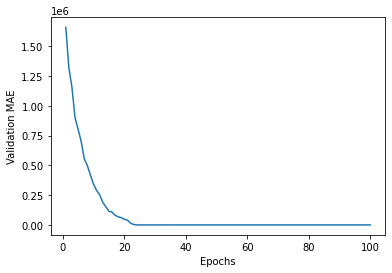

In [167]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# def smooth_curve(points, factor=0.9):
#     smoothed_points = []
#     for point in points:
#         if smoothed_points:
#             previous = smoothed_points[-1]
#             smoothed_points.append(previous * factor + point * (1 - factor))
#         else:
#             smoothed_points.append(point)
#     return smoothed_points

# smooth_mae_history = smooth_curve(average_mae_history[10:])

# plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
# plt.xlabel('Epochs')
# plt.ylabel('Validation MAE')
# plt.show()

#Final Model

In [ ]:
model = build_model()  # 새롭게 컴파일된 모델을 얻습니다.
model.fit(X_train, y_train,  # 전체 데이터로 훈련시킵니다.
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

#Reference

tf.data.Dataset.from_tensor_slices : 
https://www.tensorflow.org/tutorials/load_data/pandas_dataframe

3.6 주택 가격 예측: 회귀 문제 : 
https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-6-%EC%A3%BC%ED%83%9D-%EA%B0%80%EA%B2%A9-%EC%98%88%EC%B8%A1-%ED%9A%8C%EA%B7%80-%EB%AC%B8%EC%A0%9C/